In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 16]

In [3]:
TEST_FILES = [
    "/Users/chris/Dev/cod_records/aws/extracted/31829_B016711/31829_B016711-00000.jpg",
    "/Users/chris/Dev/cod_records/george circumstance of death.jpg"
]

In [4]:
def get_cmyk(img):
    # Create float
    bgr = img.astype(float)/255.

    # Extract channels
    with np.errstate(invalid='ignore', divide='ignore'):
        K = 1 - np.max(bgr, axis=2)
        C = (1-bgr[...,2] - K)/(1-K)
        M = (1-bgr[...,1] - K)/(1-K)
        Y = (1-bgr[...,0] - K)/(1-K)

        # Convert the input BGR image to CMYK colorspace
        CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

    # Split CMYK channels
    # -- some adaptation here by me
    #Y, M, C, K = cv2.split(CMYK)
    channels = cv2.split(CMYK)

    for chan in channels:
        np.isfinite(chan).all()

    # return channels in unknown order! (it does not actually matter)
    return channels

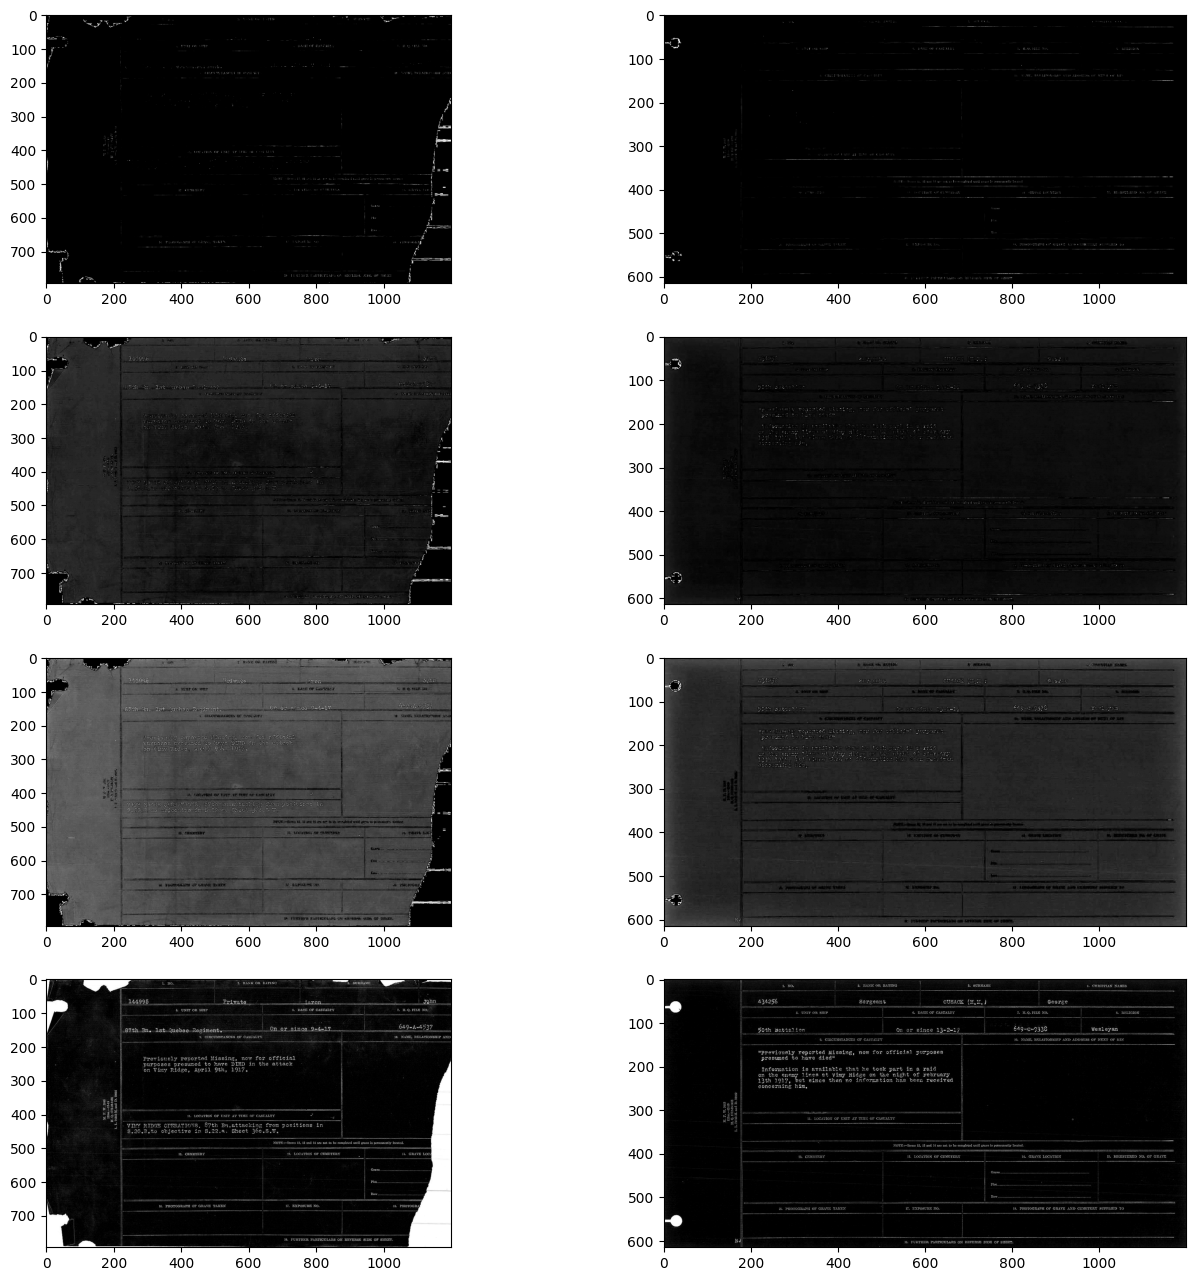

In [5]:
# Try getting all channels, this time with working function?
fig, axs = plt.subplots(4, 2)

images = []

for f in TEST_FILES:
    img = cv2.imread(f)
    images.append(get_cmyk(img))


for chan in range(4):
    for j in range(2):
        axs[chan, j].imshow(images[j][chan], cmap='gray')

[np.float64(140552.0), np.float64(76673.0)]


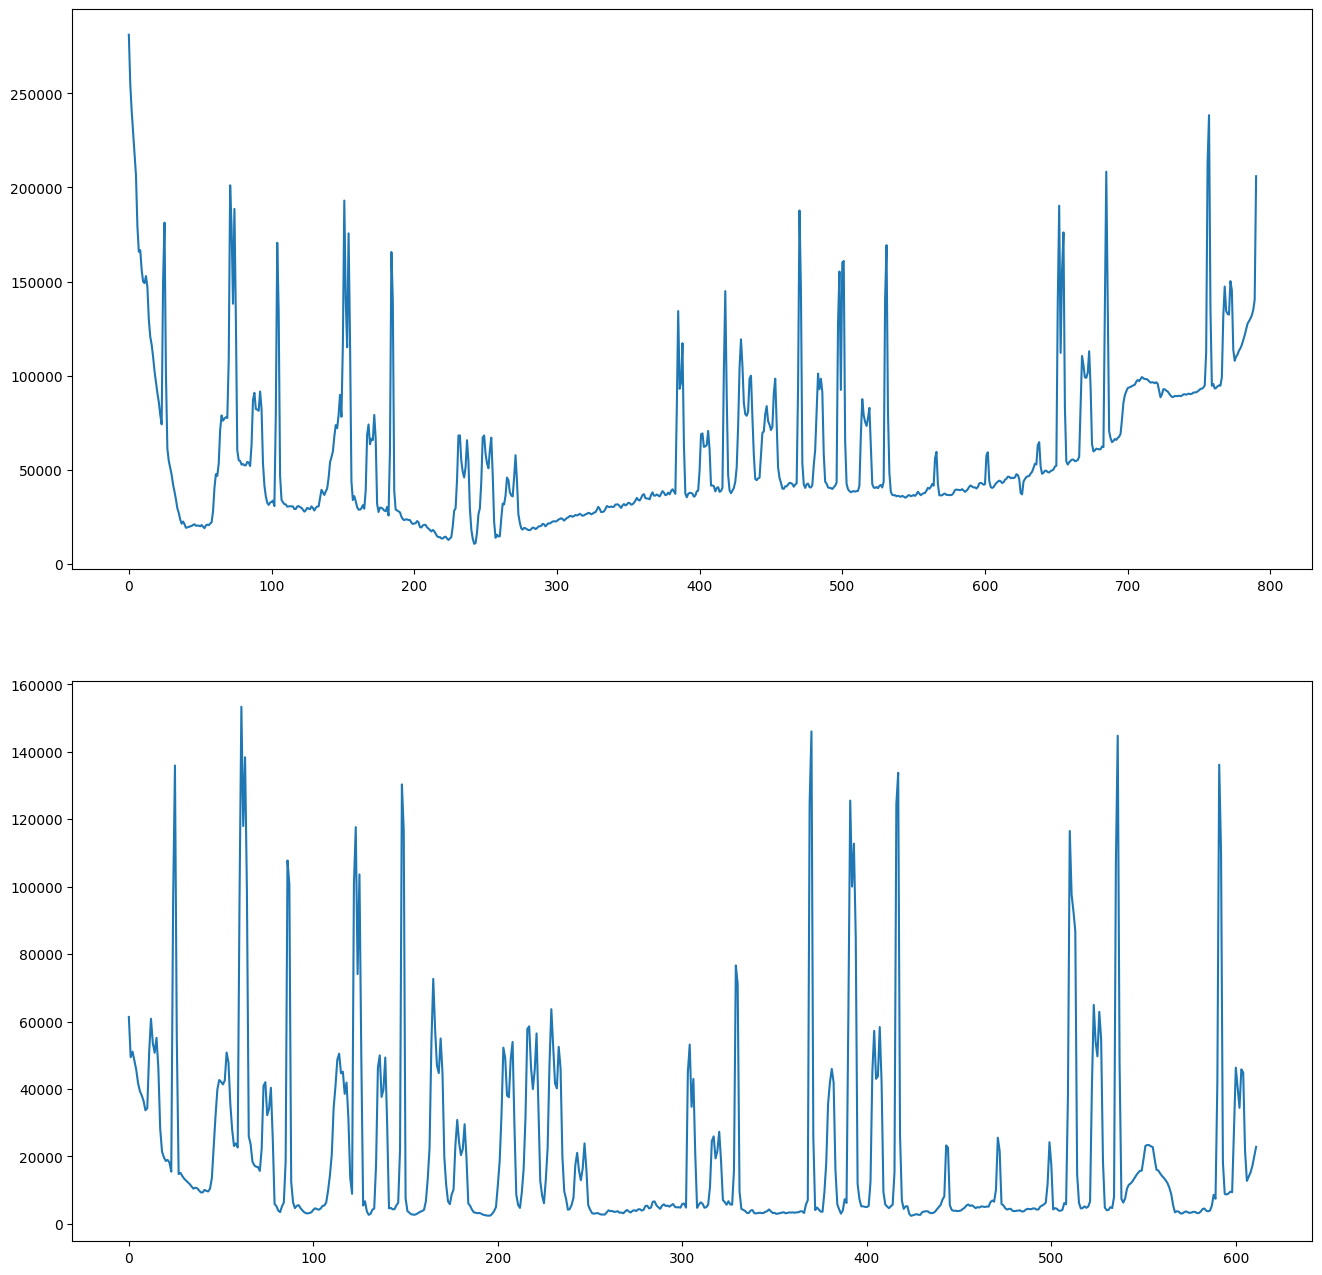

In [30]:
# Focus on channel [3] again, but this time use the row and col sums to remove lines

fig, axs = plt.subplots(2)
i = -1

cutoffs = []

for f in TEST_FILES:
    i += 1
    totals = []
    img = cv2.imread(f)
    chan = get_cmyk(img)[3]
    row_iter = iter(chan[1:-1])
    prev_row = next(row_iter)
    for next_row in row_iter:
        total = np.sum(prev_row) + np.sum(next_row)
        totals.append(total)
        prev_row = next_row
    cutoffs.append(np.max(totals) / 2)
    axs[i].plot(totals)
print(cutoffs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
24
25
71
72
74
104
151
154
184
418
470
471
498
500
501
530
531
652
654
655
685
756
757
768
772
773
790
24
25
60
61
62
63
64
86
87
122
123
125
148
149
369
370
391
392
393
394
416
417
510
511
512
513
535
536
591
592


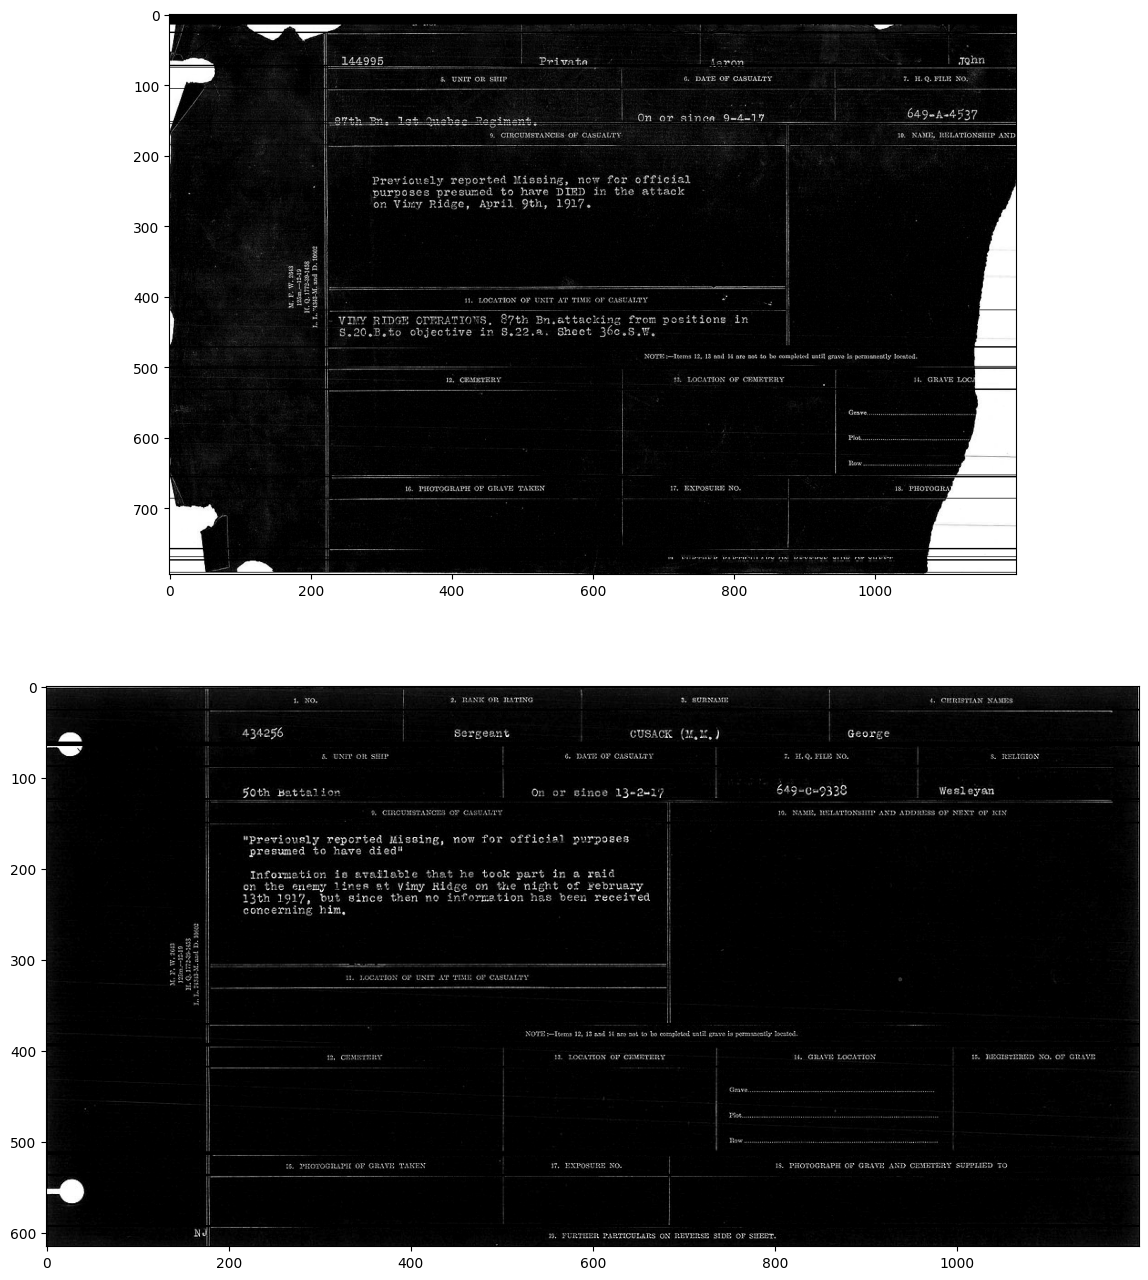

In [35]:
# Focus on channel [3] again, but this time use the row and col sums to remove lines

fig, axs = plt.subplots(2)
i = -1

for f in TEST_FILES:
    i += 1
    totals = []
    img = cv2.imread(f)
    width = img.shape[1]
    chan = get_cmyk(img)[3]
    row_iter = iter(chan[1:-1])
    prev_row = next(row_iter)
    for next_row in row_iter:
        total = np.sum(prev_row) + np.sum(next_row)
        totals.append(total)
        prev_row = next_row
    for row, total in enumerate(totals):
        if total > cutoffs[i]:
            print(row)
            chan[row+1] = np.zeros(width)
    axs[i].imshow(chan, cmap='gray')